<a href="https://colab.research.google.com/github/inesdarosa/titulares_diarios/blob/master/ConTexto_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este cuaderno se trabaja con el paquete ConTexto para el análisis de textos. 

Los datos provienen de los títulos presentes en páginas de 5 diarios de Uruguay, particularmente de un día específico. Primero se hace una limpieza del texto y luego se grafica la frecuencia de las palabras y se realiza dos nubes de palabras, unigramas y bigramas. Esto se realiza de forma independiente para cada página.

En la limpieza se realiza una lemmatización pero no se incluye el stemming porque genera muchas palabras cortadas.

Luego de hacer la limpieza del texto y mostrar los gráficos de nubes de palabras y frecuencia muestro un análisis de tópicos a través de LDA (Latent Dirichlet Allocation)

In [109]:
!pip install contexto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.6.3-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [110]:
from contexto.limpieza import * # Esta es uno de los paquetes dentro de contexto que se centra en la limpieza del texto

from contexto.exploracion import grafica_barchart_frecuencias # gráfico de frecuencias usando ConTexto
from contexto.exploracion import obtener_ngramas, par_nubes # nubes de palabras usando ConTexto

import pandas as pd # paquete necesario para trabajar con DataFrame

!pip install matplotlib==3.1.3 # Esta versión permite realizar los gráficos a pesar de que ConTexto viene con una versión más actualizada de matplotlib

import itertools # Este paquete es para pasar de una lista de lista a un flat y luego pasarlo a una lista

import numpy as np


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contexto 0.2.0 requires matplotlib>=3.3.4, but you have matplotlib 3.1.3 which is incompatible.


In [111]:
import nltk # paquete para trabajar con análisis de textos.
from nltk.corpus import stopwords # incorporación de stopwords
from nltk.tokenize import wordpunct_tokenize # permite la tokenización del texto

nltk.download('stopwords') # se baja las stopwords
nltk.download('punkt') # no estoy segura pero creo que es necesaria para las stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [112]:
# Para lemmatizar el texto, en este caso uso Stanza

from contexto.lematizacion import LematizadorSpacy, LematizadorStanza 
from contexto.lematizacion import lematizar_texto

In [113]:
!pip install pyLDAvis==3.2.2 # Esto es para la visualización de LDA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
import gensim # necesito importar este paquete para luego construir el modelo LDA
from gensim import corpora
from gensim.models import CoherenceModel# Coherence score and perplexity provide a convinent way to measure how good a given topic model is
import pyLDAvis.gensim

In [115]:
stop_words = list(stopwords.words('spanish'))
espanol = pd.read_csv('spanish.txt', header=None)
espanol.columns = ['palabra']
list_espanol = list(espanol['palabra'])
stop_words.extend(list_espanol)

unique_stop_words = []
[unique_stop_words.append(word) for word in stop_words if word not in unique_stop_words]
len(unique_stop_words)

615

In [116]:
def limpiar_tokenizar(texto):
    lematizador = LematizadorSpacy('es')
    nuevo_texto = limpieza_texto(texto, n_min=3, quitar_acentos=True, quitar_numeros=True, lista_palabras = unique_stop_words)
    nuevo_texto = wordpunct_tokenize(nuevo_texto)# esto toma espacios, símbolos, comas, etc. y los tokeniza junto con las palabras
    nuevo_texto = [token for token in nuevo_texto if len(token) > 3]
    nuevo_texto = [lematizar_texto(word, lematizador=lematizador) for word in nuevo_texto]
    
    return(nuevo_texto)

In [117]:
base = pd.read_csv('base_tit_senti_fecha.csv', encoding='iso8859_2')
base_elobse = base[base['diario'] == 'elobse']
base_elobse_fecha = base_elobse[base_elobse['fecha'] == '2021-07-23']

In [118]:
base_elobse_fecha['tit_tokenizado'] = base_elobse_fecha['titular'].apply(lambda x: limpiar_tokenizar(x))
tokenizado_elobse = list(base_elobse_fecha['tit_tokenizado'])

<ipython-input-118-487194189bd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_elobse_fecha['tit_tokenizado'] = base_elobse_fecha['titular'].apply(lambda x: limpiar_tokenizar(x))


In [119]:
# flattening the list and storing the result
flat_list = itertools.chain(*tokenizado_elobse)
# converting iterable to list and printing
#tok = print(list(flat_list))
#flat_list
tok = list(flat_list)
token_elobse = " ".join(map(str, tok))
token_elobse

'mirar ceremonia inauguracion juegos olimpico tokio contrasentido clasico penarol perdar cancha ganar discusion sueldo directorio caja profesional propuesta honorario zdonde juegos olimpico tokio uruguay crecer inter argentino montevideo compra inmueble instalar colegio delgado orsi tension referente volveran encontrar él antiguo gratuito zhay chanz ganar fifa correctivo salarial pagar trabajador domestica julio obra har sorpresa falto argumentacion alcalde blanco opinar rechazo fideicomiso dilema patrocinador japonés juegos olimpico palpitar juegos olimpico tokio pais poblacion vacunado juegos olimpico zcomo impediran brote covid tokio operativo clasico detenido menor municipio plantear construir cancha futbol tenis espacio publico gimnasio club ampliar aforo socio vacunado trigo paso grano estrella proximo cosecha lograr ajuste proyecto regular teletrabajo aprobo diputado movido gerencial incorporación uruit universidad mirador panoramico montevideo cielo costa canelón mejor bar trag

In [120]:
unigramas = obtener_ngramas(token_elobse, 1)
bigramas = obtener_ngramas(token_elobse, 2)

Acá el código para LDA, luego vendrán todos los gráficos juntos

In [121]:
dictionary_elobse = corpora.Dictionary(tokenizado_elobse)
dictionary_elobse.filter_extremes(no_below=3)# tenía esto y lo saqué: , keep_n=300

In [122]:
corpus_elobse = [dictionary_elobse.doc2bow(text) for text in tokenizado_elobse]

In [123]:
# Esto es para seleccionar la cantidad de tópicos, no cambian los valores

results = []

for t in range(2, 10):
    lda_model = gensim.models.ldamodel.LdaModel(corpus_elobse, id2word=dictionary_elobse, num_topics=t, passes=10)
    corpus_lda = lda_model[corpus_elobse]

    cm = CoherenceModel(model=lda_model, corpus=corpus_lda, texts=tokenizado_elobse, coherence='c_v')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'score'])

In [124]:
results

topic     score
0      2  0.630666
1      3  0.630666
2      4  0.630666
3      5  0.630666
4      6  0.630666
5      7  0.630666
6      8  0.630666
7      9  0.630666

In [125]:
# Define the LDA model
ldamodel_elobse = gensim.models.ldamodel.LdaModel(corpus_elobse, num_topics=4, id2word=dictionary_elobse, passes=10)# revisar los argumentos

# Save the topics and top 5 words
topics = ldamodel_elobse.print_topics(num_words=5)

# Print the results
for topic in topics:
    print(topic)

(0, '0.143*"tokio" + 0.143*"uruguay" + 0.143*"olimpico" + 0.143*"juegos" + 0.116*"paso"')
(1, '0.254*"montevideo" + 0.194*"penarol" + 0.194*"cancha" + 0.134*"argentino" + 0.074*"clasico"')
(2, '0.210*"juegos" + 0.210*"olimpico" + 0.209*"clasico" + 0.117*"inauguracion" + 0.024*"paso"')
(3, '0.331*"vacuna" + 0.130*"dosis" + 0.129*"argentino" + 0.129*"vacunado" + 0.027*"uruguay"')


In [126]:
lda_display_elobse = pyLDAvis.gensim.prepare(ldamodel_elobse, corpus_elobse, dictionary_elobse, sort_topics=False)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


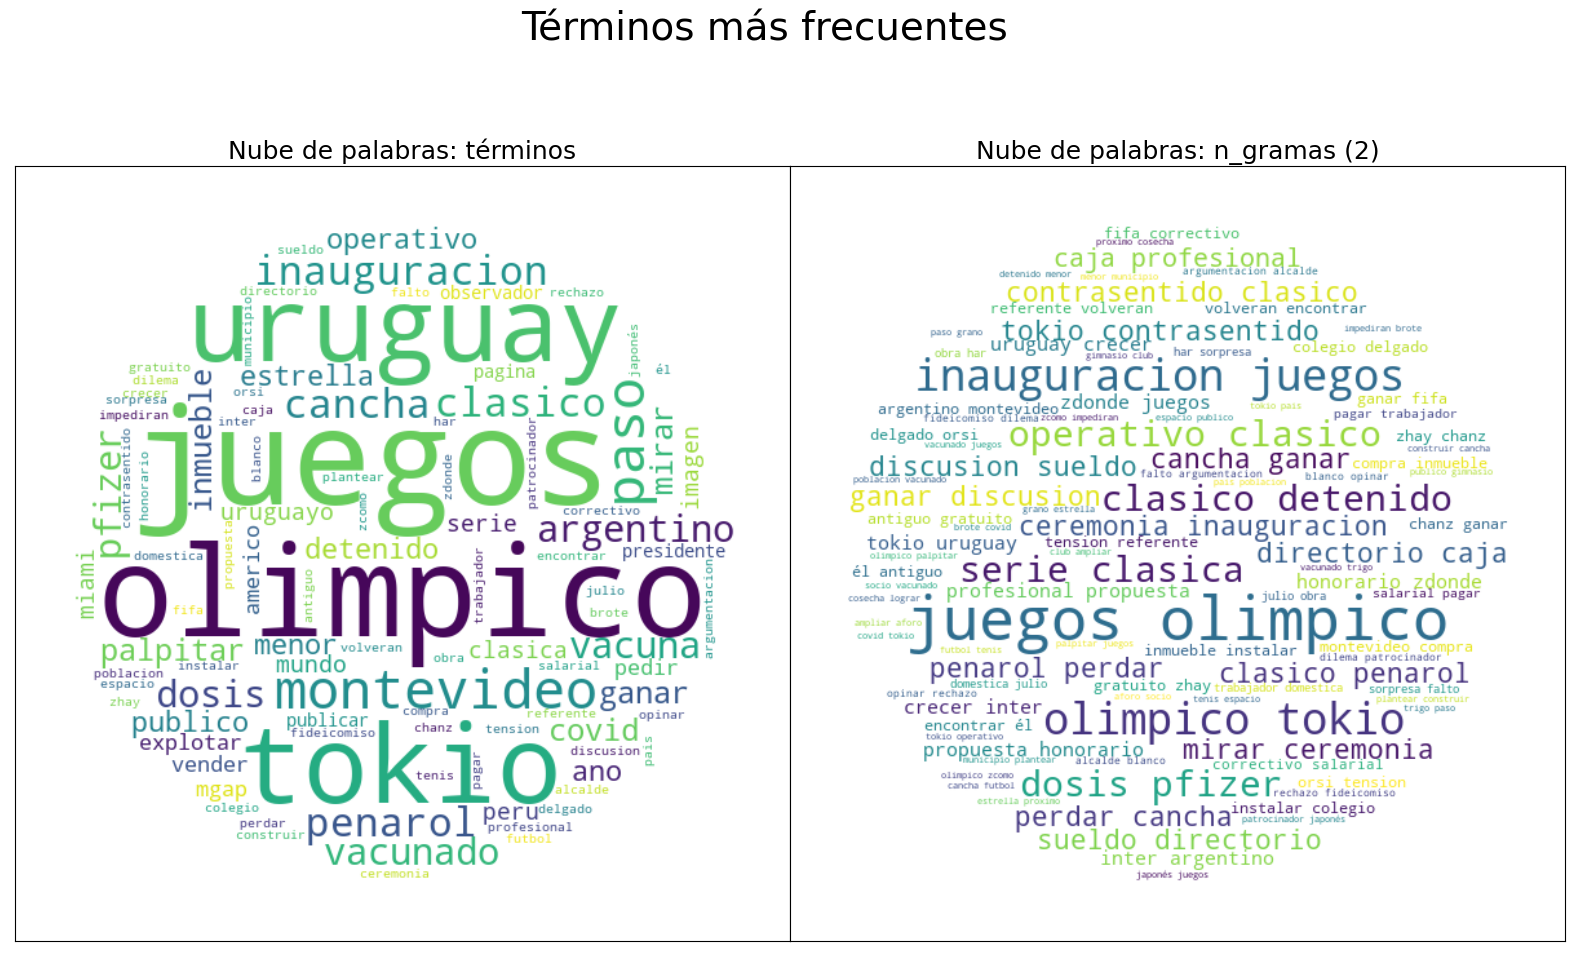

In [127]:
par_nubes(token_elobse, n1=1, n2=2, ubicacion_archivo='nube_uni_bi_elobse.jpg')

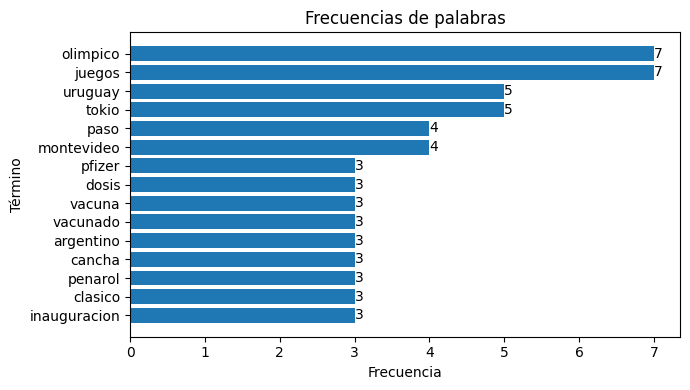

In [128]:
grafica_barchart_frecuencias(token_elobse, ubicacion_archivo='barras_palabras_elobse.jpg', 
                             titulo='Frecuencias de palabras', dim_figura=(7,4))

In [129]:
pyLDAvis.display(lda_display_elobse)

In [130]:
base = pd.read_csv('base_tit_senti_fecha.csv', encoding='iso8859_2')
base_elpais = base[base['diario'] == 'elpais']
base_elpais_fecha = base_elpais[base_elpais['fecha'] == '2021-07-23']

In [131]:
base_elpais_fecha['tit_tokenizado'] = base_elpais_fecha['titular'].apply(lambda x: limpiar_tokenizar(x))
tokenizado_elpais = list(base_elpais_fecha['tit_tokenizado'])

<ipython-input-131-fdefbd34f6b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_elpais_fecha['tit_tokenizado'] = base_elpais_fecha['titular'].apply(lambda x: limpiar_tokenizar(x))


In [132]:
# flattening the list and storing the result
flat_list = itertools.chain(*tokenizado_elpais)
# converting iterable to list and printing
#tok = print(list(flat_list))
#flat_list
tok = list(flat_list)
token_elpais = " ".join(map(str, tok))
token_elpais

'incautar millon jefe banda vendiar titulo universitario falso dosis covid experto evidencia impacto contagio zcuar jugar penarol sporting cristal camino avanzar fase minuto minuto segui inauguracion juegos olimpico tokio juegos olimpico vivir atleta uruguay ceremonia inaugural corte numero firma rechazar seguir estudio zcomo plan cadena burger king starbucks eliminar fila sector riesgo alto lavado report preocupar gobierno judoca paralimpico henry borg pelea tatami vida antel darir servicio alojamiento netflix videojuego zcar implicar tribunal cuenta har censo funcionario crear registro vacunado vacunado llego corea argentino dinero termo inteligente desafia stanley primero sanción bidir cuba comienzo penarol aguantar ventaja traer parque cerro clasificacion problema vuelta aromo plantel festejo clasificacion calor gente cantitir especial alejandro cappuccio hincha nacional pedir disculpa caso mensaje ruglio larriera clasificacion formiliano penarol unico nacional ganar campeon siglo 

In [133]:
unigramas = obtener_ngramas(token_elpais, 1)
bigramas = obtener_ngramas(token_elpais, 2)

Acá el código para LDA, luego vendrán todos los gráficos juntos

In [134]:
dictionary_elpais = corpora.Dictionary(tokenizado_elpais)
dictionary_elpais.filter_extremes(no_below=3)# tenía esto y lo saqué: , keep_n=300

In [135]:
corpus_elpais = [dictionary_elpais.doc2bow(text) for text in tokenizado_elpais]

In [136]:
# Esto es para seleccionar la cantidad de tópicos, no cambian los valores

results = []

for t in range(2, 10):
    lda_model = gensim.models.ldamodel.LdaModel(corpus_elpais, id2word=dictionary_elpais, num_topics=t, passes=10)
    corpus_lda = lda_model[corpus_elpais]

    cm = CoherenceModel(model=lda_model, corpus=corpus_lda, texts=tokenizado_elpais, coherence='c_v')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'score'])

In [137]:
results

topic     score
0      2  0.639427
1      3  0.639427
2      4  0.639427
3      5  0.639427
4      6  0.639427
5      7  0.639427
6      8  0.639427
7      9  0.639427

In [138]:
# Define the LDA model
ldamodel_elpais = gensim.models.ldamodel.LdaModel(corpus_elpais, num_topics=5, id2word=dictionary_elpais, passes=10)# revisar los argumentos

# Save the topics and top 5 words
topics = ldamodel_elpais.print_topics(num_words=5)

# Print the results
for topic in topics:
    print(topic)

(0, '0.513*"netflix" + 0.194*"videojuego" + 0.034*"argentino" + 0.034*"bajo" + 0.032*"marca"')
(1, '0.286*"vuelta" + 0.285*"penarol" + 0.284*"clasificacion" + 0.019*"juegos" + 0.019*"olimpico"')
(2, '0.285*"argentino" + 0.197*"olimpico" + 0.197*"juegos" + 0.196*"videojuego" + 0.018*"uruguay"')
(3, '0.510*"uruguay" + 0.117*"olimpico" + 0.117*"juegos" + 0.117*"vuelta" + 0.020*"argentino"')
(4, '0.390*"marca" + 0.389*"bajo" + 0.025*"videojuego" + 0.025*"clasificacion" + 0.024*"argentino"')


In [139]:
lda_display_elpais = pyLDAvis.gensim.prepare(ldamodel_elpais, corpus_elpais, dictionary_elpais, sort_topics=False)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


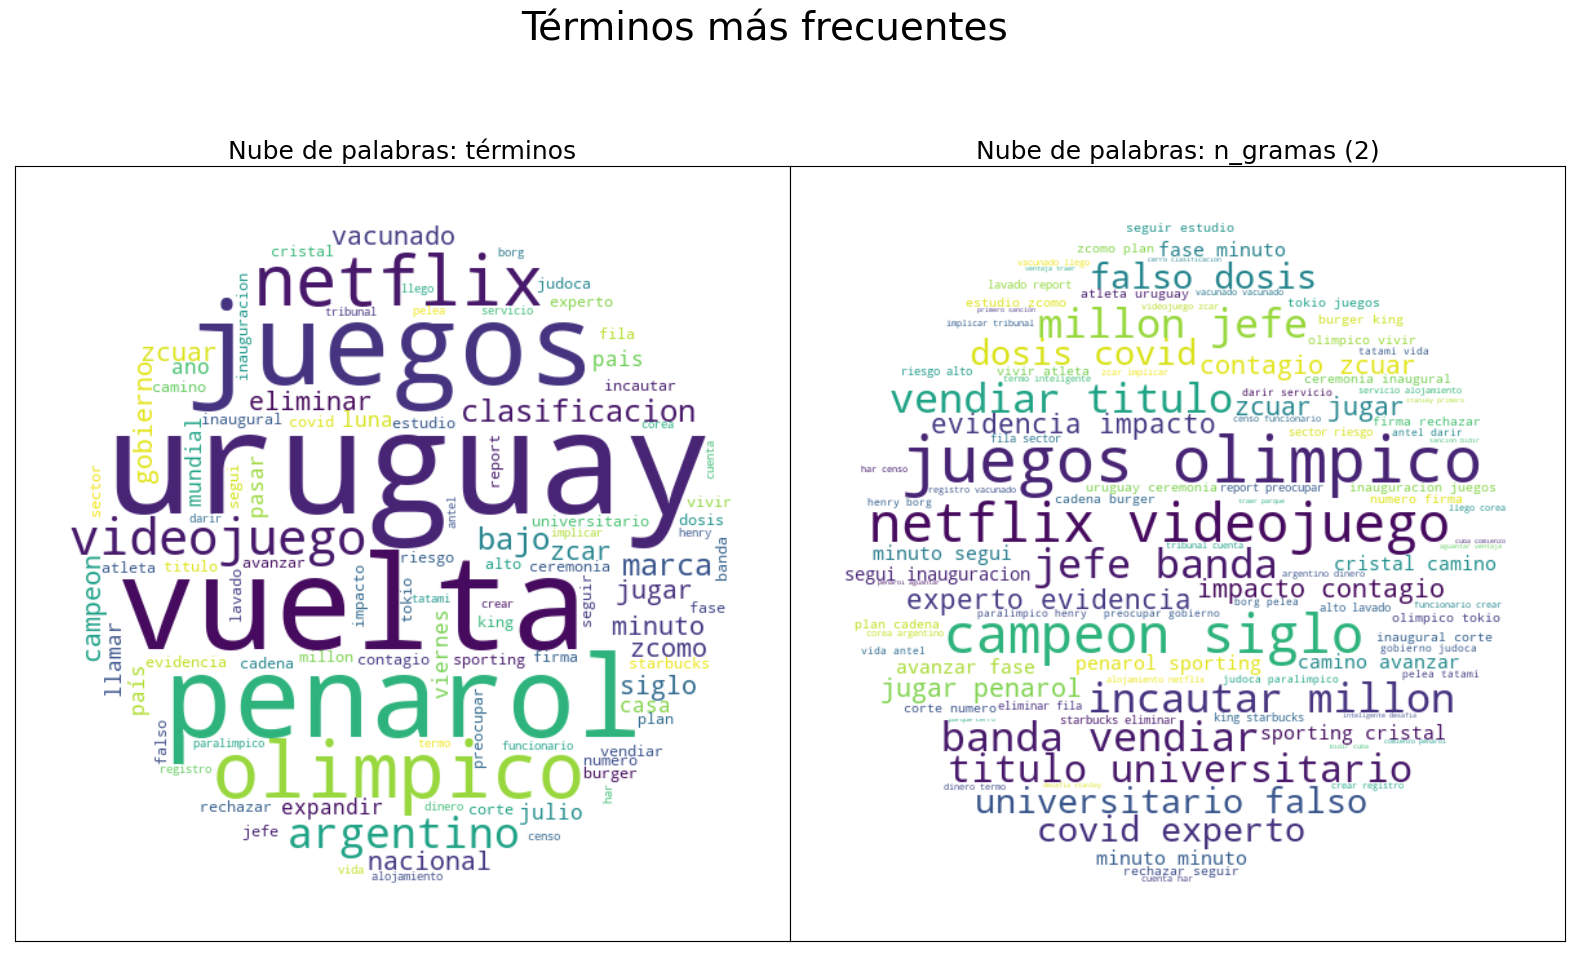

In [140]:
par_nubes(token_elpais, n1=1, n2=2, ubicacion_archivo='nube_uni_bi_elpais.jpg')

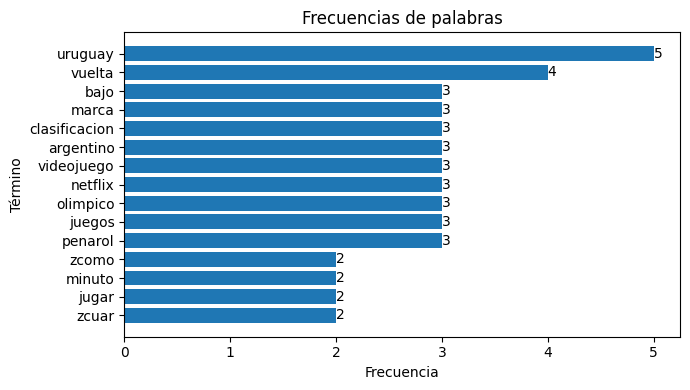

In [141]:
grafica_barchart_frecuencias(token_elpais, ubicacion_archivo='barras_palabras_elpais.jpg', 
                             titulo='Frecuencias de palabras', dim_figura=(7,4))

In [142]:
pyLDAvis.display(lda_display_elpais)

In [143]:
base = pd.read_csv('base_tit_senti_fecha.csv', encoding='iso8859_2')
base_ladiar = base[base['diario'] == 'ladiar']
base_ladiar_fecha = base_ladiar[base_ladiar['fecha'] == '2021-07-23']

In [144]:
base_ladiar_fecha['tit_tokenizado'] = base_ladiar_fecha['titular'].apply(lambda x: limpiar_tokenizar(x))
tokenizado_ladiar = list(base_ladiar_fecha['tit_tokenizado'])

<ipython-input-144-c6ae05ebe6cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_ladiar_fecha['tit_tokenizado'] = base_ladiar_fecha['titular'].apply(lambda x: limpiar_tokenizar(x))


In [145]:
# flattening the list and storing the result
flat_list = itertools.chain(*tokenizado_ladiar)
# converting iterable to list and printing
#tok = print(list(flat_list))
#flat_list
tok = list(flat_list)
token_ladiar = " ".join(map(str, tok))
token_ladiar

'crecer choque coalicion aprobar él fideicomiso canelón acusación presion politiqueria juegos olimpico tokio calendario competencia deporte encuentro penarol elimino nacional paso cuarto sudamericano global visitante estrategia ministerio interior evaluar él rendicion cuenta plantear meta cumplir plenario centro partido miranda  futuro conduccion partido sindicato ensenanza entrar proceso discusion recuperar cargo docente codecir estafa pastor evangelico colonia vendiar titulo falso extranjero logo unesco incautar bien millon dolar gobierno chino rechazo investigacion territorio determinar origen pandemia covid rucvds exhortar gobierno subsanar atraso pago equipo tecnico servicio violencia genero resolver faltar solución habitacional zcar virus albergar murcielago uruguayo ensenar contexto pandemia marós giorgio encantar mundo apunte firma apunte entretelón canelón apunte periodismo cabildo abierto apunte gobernando atropellado laurel hubbard atleta transgenero juegos olimpico futbol f

In [146]:
unigramas = obtener_ngramas(token_ladiar, 1)
bigramas = obtener_ngramas(token_ladiar, 2)

Acá el código para LDA, luego vendrán todos los gráficos juntos

In [147]:
dictionary_ladiar = corpora.Dictionary(tokenizado_ladiar)
dictionary_ladiar.filter_extremes(no_below=3)# tenía esto y lo saqué: , keep_n=300

In [148]:
corpus_ladiar = [dictionary_ladiar.doc2bow(text) for text in tokenizado_ladiar]

In [149]:
# Esto es para seleccionar la cantidad de tópicos, no cambian los valores

results = []

for t in range(2, 10):
    lda_model = gensim.models.ldamodel.LdaModel(corpus_ladiar, id2word=dictionary_ladiar, num_topics=t, passes=10)
    corpus_lda = lda_model[corpus_ladiar]

    cm = CoherenceModel(model=lda_model, corpus=corpus_lda, texts=tokenizado_ladiar, coherence='c_v')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'score'])

In [150]:
results

topic     score
0      2  0.726059
1      3  0.726059
2      4  0.726059
3      5  0.726059
4      6  0.726059
5      7  0.726059
6      8  0.726059
7      9  0.726059

In [151]:
# Define the LDA model
ldamodel_ladiar = gensim.models.ldamodel.LdaModel(corpus_ladiar, num_topics=5, id2word=dictionary_ladiar, passes=10)# revisar los argumentos

# Save the topics and top 5 words
topics = ldamodel_ladiar.print_topics(num_words=5)

# Print the results
for topic in topics:
    print(topic)

(0, '0.315*"uruguay" + 0.228*"gigante" + 0.184*"numero" + 0.096*"gobierno" + 0.053*"faltar"')
(1, '0.361*"pandemia" + 0.211*"tiempo" + 0.160*"mujer" + 0.061*"gobierno" + 0.060*"uruguayo"')
(2, '0.258*"juegos" + 0.217*"olimpico" + 0.177*"coronavirus" + 0.177*"tokio" + 0.051*"uruguayo"')
(3, '0.171*"nino" + 0.171*"estafa" + 0.168*"cabildo" + 0.168*"abierto" + 0.118*"faltar"')
(4, '0.379*"apunte" + 0.289*"canelón" + 0.027*"juegos" + 0.024*"olimpico" + 0.023*"abierto"')


In [152]:
lda_display_ladiar = pyLDAvis.gensim.prepare(ldamodel_ladiar, corpus_ladiar, dictionary_ladiar, sort_topics=False)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


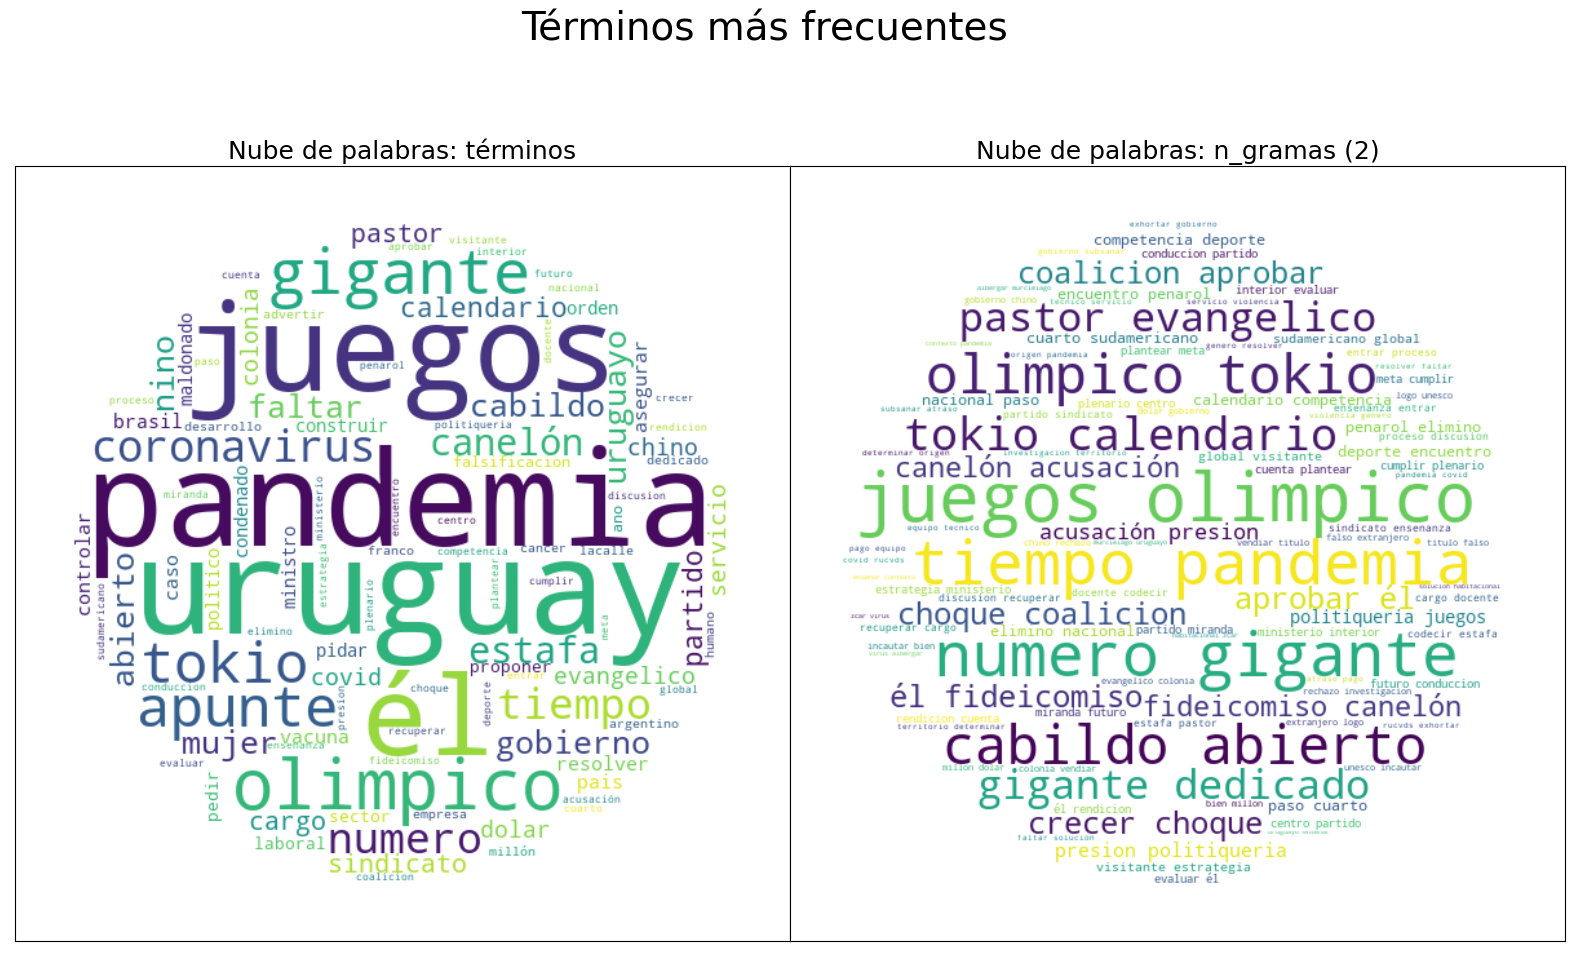

In [153]:
par_nubes(token_ladiar, n1=1, n2=2, ubicacion_archivo='nube_uni_bi_ladiar.jpg')

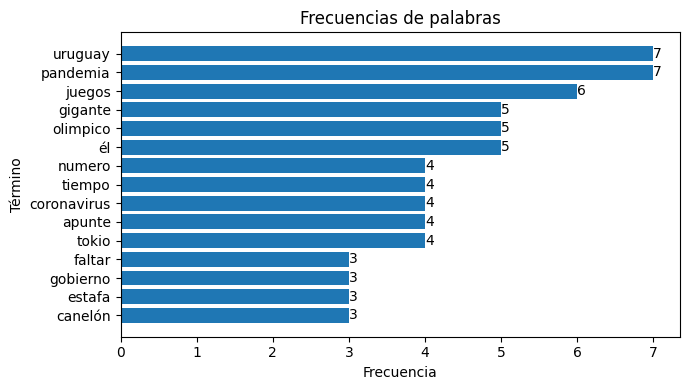

In [154]:
grafica_barchart_frecuencias(token_ladiar, ubicacion_archivo='barras_palabras_ladiar.jpg', 
                             titulo='Frecuencias de palabras', dim_figura=(7,4))

In [155]:
pyLDAvis.display(lda_display_ladiar)

In [156]:
base = pd.read_csv('base_tit_senti_fecha.csv', encoding='iso8859_2')
base_montev = base[base['diario'] == 'montev']
base_montev_fecha = base_montev[base_montev['fecha'] == '2021-07-23']

In [157]:
base_montev_fecha['tit_tokenizado'] = base_montev_fecha['titular'].apply(lambda x: limpiar_tokenizar(x))
tokenizado_montev = list(base_montev_fecha['tit_tokenizado'])

<ipython-input-157-06e05dbab2fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_montev_fecha['tit_tokenizado'] = base_montev_fecha['titular'].apply(lambda x: limpiar_tokenizar(x))


In [158]:
# flattening the list and storing the result
flat_list = itertools.chain(*tokenizado_montev)
# converting iterable to list and printing
#tok = print(list(flat_list))
#flat_list
tok = list(flat_list)
token_montev = " ".join(map(str, tok))
token_montev

'efecto rebano lograr uruguay dificultad bajo vacunacion regional clasico festejo penarol red vestuario eliminar nacional clasico mensaje ignacio ruglio clasificacion aurinegra frente nacional tokio marchar desfile inaugural juegos olimpico niffouri fideicomiso habio millón sabiar ir documental buitre disponible sala virtual ano prision hombre reiterado abuso sexual menor orgulloso hacer giovanni gonzalez eliminar nacional clasico galeria clasificacion penarol sudamericano frente nacional mes nieripeso criptomoneda uruguaya buscar sistema fernandar tria miedo visitar parte oscuro corazon humano junta dtal condeno bloqueo cuba reivindicar derecho manifestación pacifica rendicion cuenta familiar policia perderiar cobertura hospital policial hombre acribillado tiro bordo auto rivero penarol obligacion clasificar hacer merito mauricio larriera responsabilidad afectivo amor consciente mes inactividad celebrar reapertura cine taller innovacion mecanico robotico programacion nino lynch gobern

In [159]:
unigramas = obtener_ngramas(token_montev, 1)
bigramas = obtener_ngramas(token_montev, 2)

Acá el código para LDA, luego vendrán todos los gráficos juntos

In [160]:
dictionary_montev = corpora.Dictionary(tokenizado_montev)
dictionary_montev.filter_extremes(no_below=3)# tenía esto y lo saqué: , keep_n=300

In [161]:
corpus_montev = [dictionary_montev.doc2bow(text) for text in tokenizado_montev]

In [162]:
# Esto es para seleccionar la cantidad de tópicos, no cambian los valores

results = []

for t in range(2, 10):
    lda_model = gensim.models.ldamodel.LdaModel(corpus_montev, id2word=dictionary_montev, num_topics=t, passes=10)
    corpus_lda = lda_model[corpus_montev]

    cm = CoherenceModel(model=lda_model, corpus=corpus_lda, texts=tokenizado_montev, coherence='c_v')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'score'])

In [163]:
results

topic     score
0      2  0.586343
1      3  0.586343
2      4  0.586343
3      5  0.586343
4      6  0.586343
5      7  0.586343
6      8  0.586343
7      9  0.586343

In [164]:
# Define the LDA model
ldamodel_montev = gensim.models.ldamodel.LdaModel(corpus_montev, num_topics=5, id2word=dictionary_montev, passes=10)# revisar los argumentos

# Save the topics and top 5 words
topics = ldamodel_montev.print_topics(num_words=5)

# Print the results
for topic in topics:
    print(topic)

(0, '0.617*"hombre" + 0.072*"cuba" + 0.039*"nacional" + 0.039*"juegos" + 0.039*"delta"')
(1, '0.358*"sudamericano" + 0.220*"juegos" + 0.174*"penarol" + 0.163*"nacional" + 0.015*"clasico"')
(2, '0.326*"opinion" + 0.325*"uruguay" + 0.235*"cuba" + 0.020*"nacional" + 0.016*"juegos"')
(3, '0.414*"nacional" + 0.289*"clasico" + 0.199*"penarol" + 0.014*"uruguay" + 0.014*"delta"')
(4, '0.637*"delta" + 0.042*"clasico" + 0.041*"uruguay" + 0.040*"nacional" + 0.040*"juegos"')


In [165]:
lda_display_montev = pyLDAvis.gensim.prepare(ldamodel_montev, corpus_montev, dictionary_montev, sort_topics=False)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


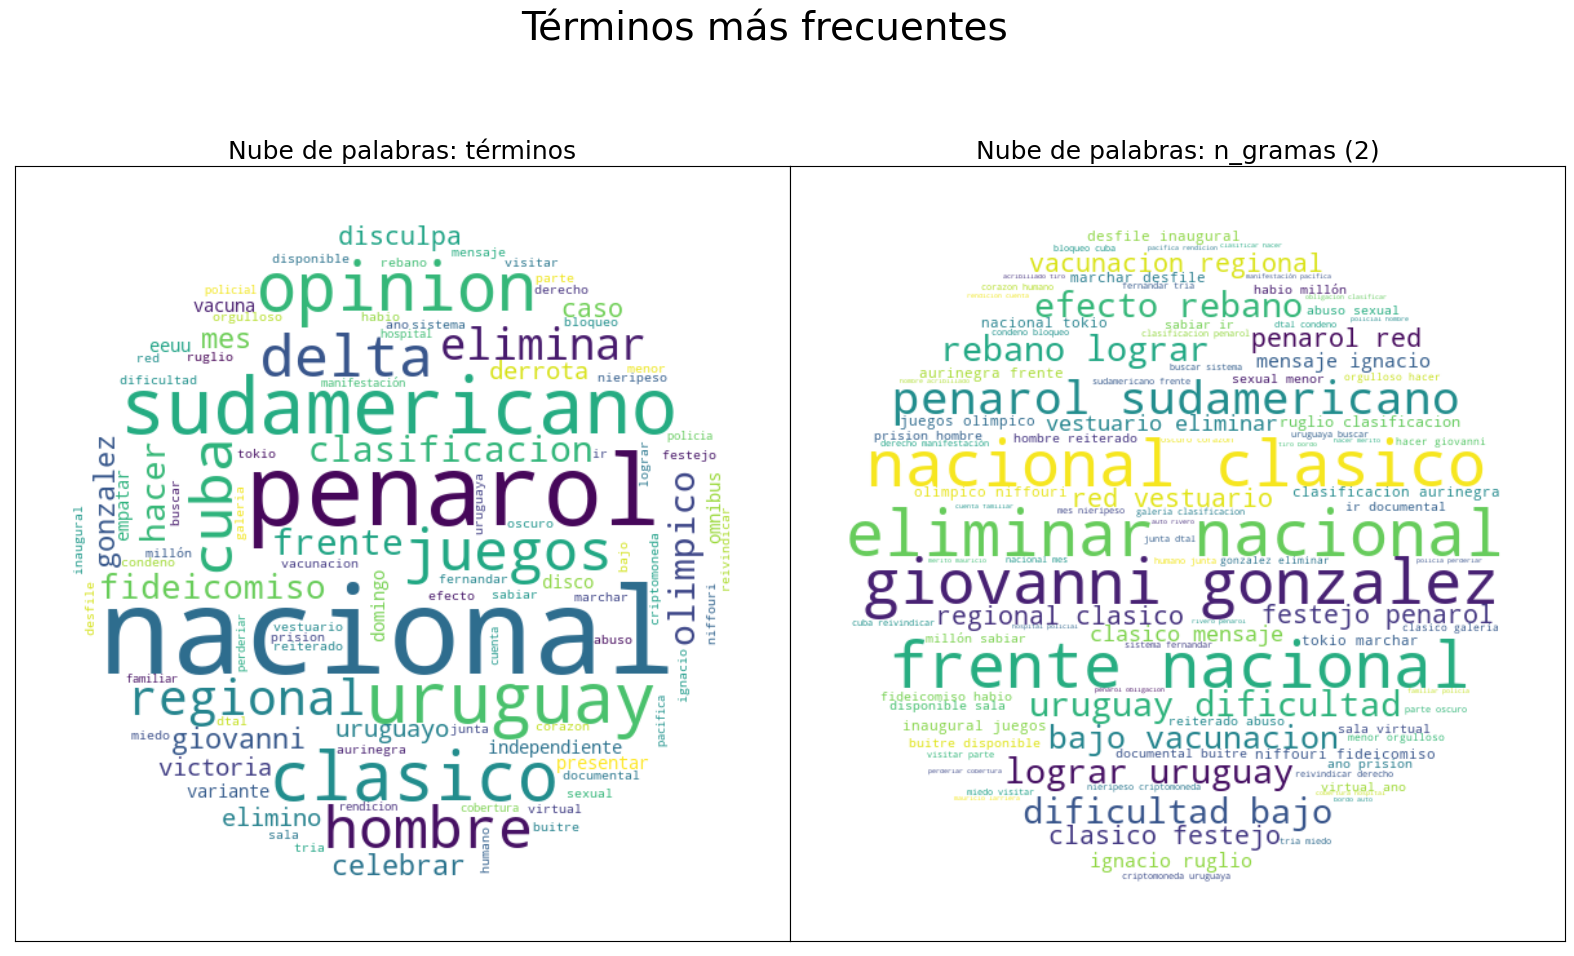

In [166]:
par_nubes(token_montev, n1=1, n2=2, ubicacion_archivo='nube_uni_bi_montev.jpg')

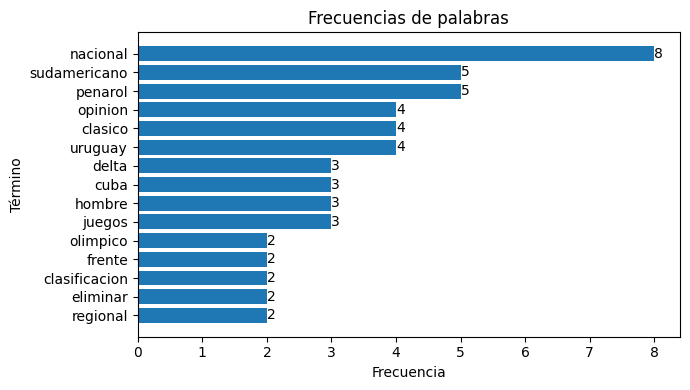

In [167]:
grafica_barchart_frecuencias(token_montev, ubicacion_archivo='barras_palabras_montev.jpg', 
                             titulo='Frecuencias de palabras', dim_figura=(7,4))

In [168]:
pyLDAvis.display(lda_display_montev)

In [169]:
base = pd.read_csv('base_tit_senti_fecha.csv', encoding='iso8859_2')
base_republ = base[base['diario'] == 'republ']
base_republ_fecha = base_republ[base_republ['fecha'] == '2021-07-23']

In [170]:
base_republ_fecha['tit_tokenizado'] = base_republ_fecha['titular'].apply(lambda x: limpiar_tokenizar(x))
tokenizado_republ = list(base_republ_fecha['tit_tokenizado'])

<ipython-input-170-668806075f82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_republ_fecha['tit_tokenizado'] = base_republ_fecha['titular'].apply(lambda x: limpiar_tokenizar(x))


In [171]:
# flattening the list and storing the result
flat_list = itertools.chain(*tokenizado_republ)
# converting iterable to list and printing
#tok = print(list(flat_list))
#flat_list
tok = list(flat_list)
token_republ = " ".join(map(str, tok))
token_republ

'olesker testa politico salarial perjudicar clase trabajadorat empezo ceremonia inaugural juegos olimpico tokio operativo clasico termino detenido madrugada gobierno analizar cerrar fila defender tuán proyecto tenencia compartido tponir riesgo infanciat ciudadano votar ente depositar banca privado definir dosis poblacion proximo semana caso activo coronavirus ubicar bauzo confirmar retorno publico estadio agosto couto frente amplio pleno proceso reacomodot historia actualidad puerto dolor cementerio barco abandonado puerto montevideo despues ano penarol volver jugar cuarto final copa importancia microbiotar intestinal cabildo abierto presentar proyecto combatir ciberdelito fiesta aurinegra pese perder penarol clasifico afuero nacional panorama supuesto implicado comuna noticia cualquiera carnaval futuro amarguear deporte loco tema teatro verde chicán alma guarani industria turf estacion ajedrez uruguay desfilo ceremonia juegos olimpico pabellon alto cappuccio pedir disculpa hincha hace

In [172]:
unigramas = obtener_ngramas(token_republ, 1)
bigramas = obtener_ngramas(token_republ, 2)

Acá el código para LDA, luego vendrán todos los gráficos juntos

In [173]:
dictionary_republ = corpora.Dictionary(tokenizado_republ)
dictionary_republ.filter_extremes(no_below=3)# tenía esto y lo saqué: , keep_n=300

In [174]:
corpus_republ = [dictionary_republ.doc2bow(text) for text in tokenizado_republ]

In [175]:
# Esto es para seleccionar la cantidad de tópicos, no cambian los valores

results = []

for t in range(2, 10):
    lda_model = gensim.models.ldamodel.LdaModel(corpus_republ, id2word=dictionary_republ, num_topics=t, passes=10)
    corpus_lda = lda_model[corpus_republ]

    cm = CoherenceModel(model=lda_model, corpus=corpus_lda, texts=tokenizado_republ, coherence='c_v')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'score'])

In [176]:
results

topic     score
0      2  0.334116
1      3  0.334116
2      4  0.334116
3      5  0.334116
4      6  0.334116
5      7  0.334116
6      8  0.334116
7      9  0.334116

In [177]:
# Define the LDA model
ldamodel_republ = gensim.models.ldamodel.LdaModel(corpus_republ, num_topics=3, id2word=dictionary_republ, passes=10)# revisar los argumentos

# Save the topics and top 5 words
topics = ldamodel_republ.print_topics(num_words=5)

# Print the results
for topic in topics:
    print(topic)

(0, '0.476*"juegos" + 0.476*"olimpico" + 0.048*"mujer"')
(1, '0.338*"mujer" + 0.331*"olimpico" + 0.331*"juegos"')
(2, '0.831*"mujer" + 0.084*"olimpico" + 0.084*"juegos"')


In [178]:
lda_display_republ = pyLDAvis.gensim.prepare(ldamodel_republ, corpus_republ, dictionary_republ, sort_topics=False)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


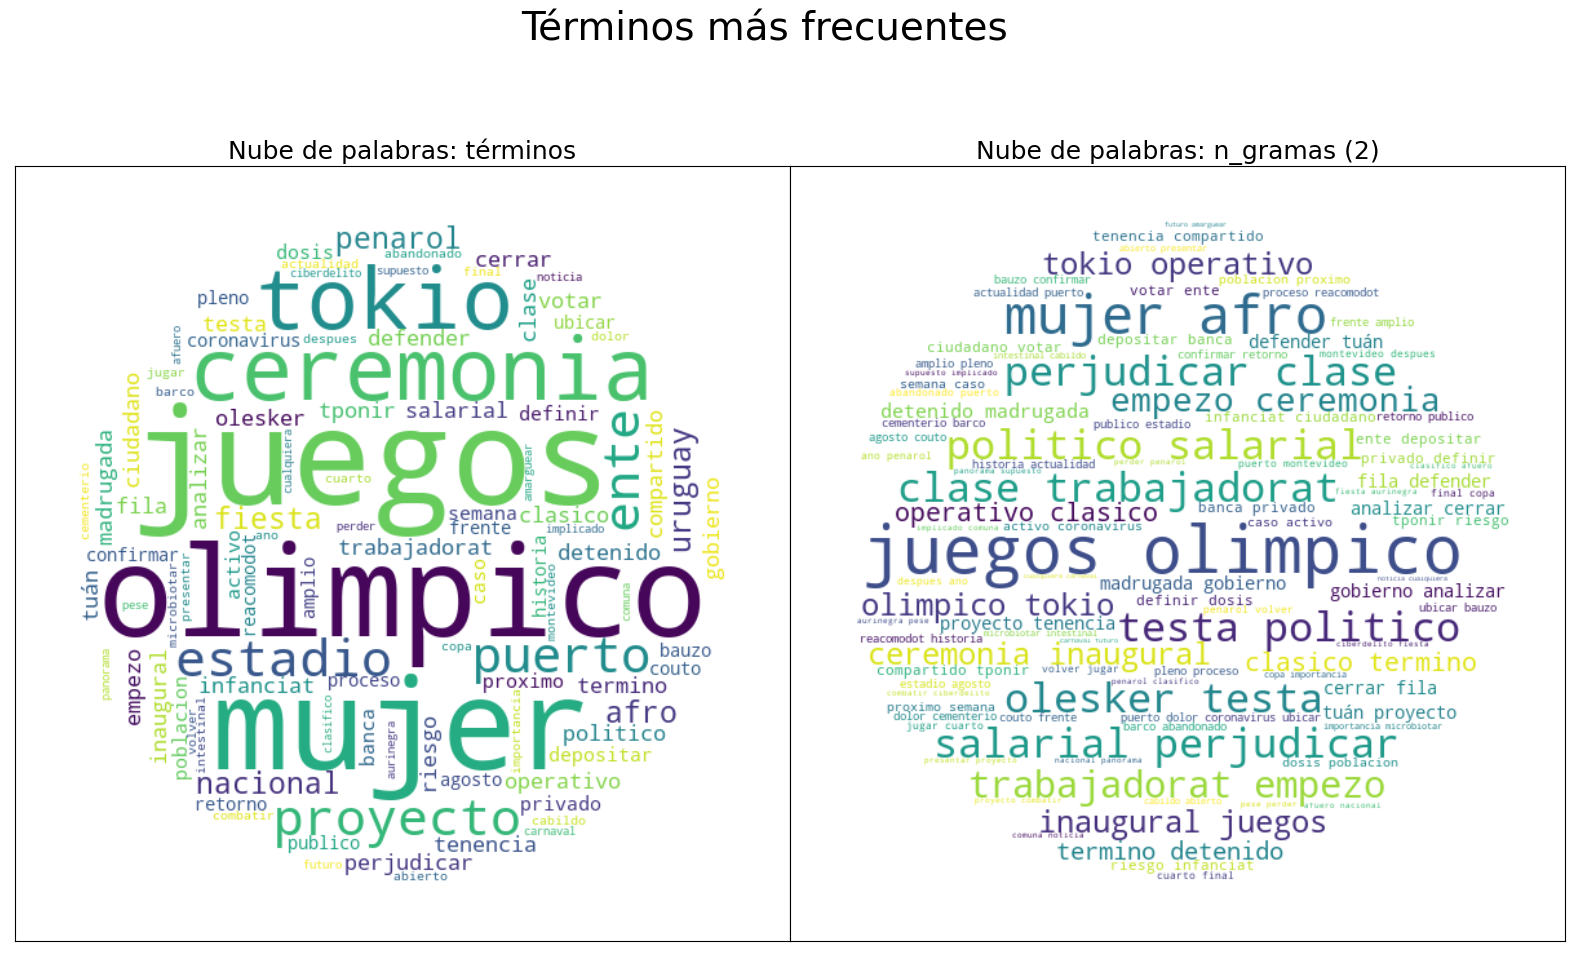

In [179]:
par_nubes(token_republ, n1=1, n2=2, ubicacion_archivo='nube_uni_bi_republ.jpg')

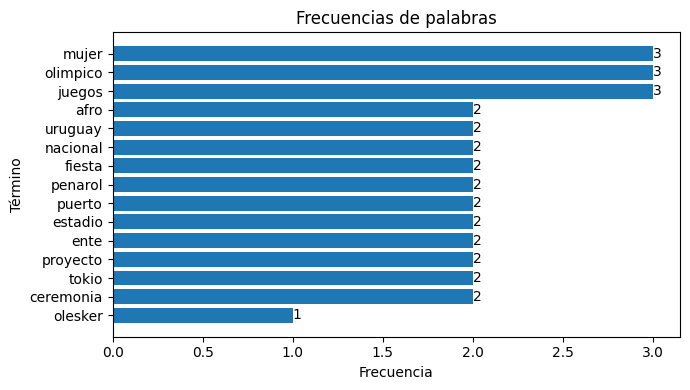

In [180]:
grafica_barchart_frecuencias(token_republ, ubicacion_archivo='barras_palabras_republ.jpg', 
                             titulo='Frecuencias de palabras', dim_figura=(7,4))

In [181]:
pyLDAvis.display(lda_display_republ)

A partir de acá vamos a ver nuevamente los datos de las palabras más frecuentes pero graficadas las frecuencias de las páginas juntas.

Luego la correlación entre las páginas correlación por el uso y frecuencia de palabras.

También hay algunos análisis de sentimiento incluidos

Para estos análisis ver: https://www.cienciadedatos.net/documentos/py25-text-mining-python.html

In [182]:
# Hay un tema acá con la versión de matplotlib, por eso lo importo acá y no antes (Tengo que probar si poniendolo arriba no me jode los gráficos anteriores)

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [ ]:
base = pd.read_csv('base_tit_senti_fecha.csv', encoding='iso8859_2')
base_fecha = base[base['fecha'] == '2021-07-23']
base_fecha

In [184]:
print('\n''Número de títulos por diario en la fecha seleccionada: 2021-07-23')
print('--------------------------')

base_fecha.groupby(by='diario')['titular'].count() # El número de titulos por diario


Número de títulos por diario en la fecha seleccionada: 2021-07-23
--------------------------


diario
elobse    69
elpais    69
ladiar    87
montev    70
republ    53
Name: titular, dtype: int64

In [185]:
base_fecha['tit_tokenizado'] = base_fecha['titular'].apply(lambda x: limpiar_tokenizar(x))
#tokenizado_fecha = list(base_fecha['tit_tokenizado'])

<ipython-input-185-4ab34d8d518b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_fecha['tit_tokenizado'] = base_fecha['titular'].apply(lambda x: limpiar_tokenizar(x))


In [186]:
base_fecha_tidy = base_fecha.explode(column='tit_tokenizado')
base_fecha_tidy = base_fecha_tidy.drop(columns='titular')
base_fecha_tidy = base_fecha_tidy.rename(columns={'tit_tokenizado':'token'})
base_fecha_tidy.head(5)

fecha  diario sentimiento         token
0  2021-07-23  elobse         NEU         mirar
0  2021-07-23  elobse         NEU     ceremonia
0  2021-07-23  elobse         NEU  inauguracion
0  2021-07-23  elobse         NEU        juegos
0  2021-07-23  elobse         NEU      olimpico

In [187]:
print('\n''Palabras totales por diario')
print('--------------------------')
base_fecha_tidy.groupby(by='diario')['token'].count()


Palabras totales por diario
--------------------------


diario
elobse    411
elpais    438
ladiar    592
montev    450
republ    215
Name: token, dtype: int64

In [228]:
# Número de palabras comunes
# ==============================================================================
palabras_elpais = set(base_fecha_tidy[base_fecha_tidy.diario == 'elpais']['token'])
palabras_elobse = set(base_fecha_tidy[base_fecha_tidy.diario == 'elobse']['token'])
palabras_ladiar = set(base_fecha_tidy[base_fecha_tidy.diario == 'ladiar']['token'])
palabras_montev = set(base_fecha_tidy[base_fecha_tidy.diario == 'montev']['token'])
palabras_republ = set(base_fecha_tidy[base_fecha_tidy.diario == 'republ']['token'])

print(f"Palabras comunes entre elpais y elobse: {len(palabras_elpais.intersection(palabras_elobse))}")
print(f"Palabras comunes entre elpais y montev: {len(palabras_elpais.intersection(palabras_montev))}")
print(f"Palabras comunes entre elpais y ladiar: {len(palabras_elpais.intersection(palabras_ladiar))}")
print(f"Palabras comunes entre elpais y republ: {len(palabras_elpais.intersection(palabras_republ))}")
print(f"Palabras comunes entre elobse y ladiar: {len(palabras_elobse.intersection(palabras_ladiar))}")
print(f"Palabras comunes entre elobse y republ: {len(palabras_elobse.intersection(palabras_republ))}")
print(f"Palabras comunes entre elobse y montev: {len(palabras_elobse.intersection(palabras_montev))}")
print(f"Palabras comunes entre republ y montev: {len(palabras_republ.intersection(palabras_montev))}")
print(f"Palabras comunes entre republ y ladiar: {len(palabras_republ.intersection(palabras_ladiar))}")
print(f"Palabras comunes entre montev y ladiar: {len(palabras_montev.intersection(palabras_ladiar))}")


Palabras comunes entre elpais y elobse: 65
Palabras comunes entre elpais y montev: 64
Palabras comunes entre elpais y ladiar: 79
Palabras comunes entre elpais y republ: 44
Palabras comunes entre elobse y ladiar: 77
Palabras comunes entre elobse y republ: 46
Palabras comunes entre elobse y montev: 58
Palabras comunes entre republ y montev: 42
Palabras comunes entre republ y ladiar: 58
Palabras comunes entre montev y ladiar: 59


In [188]:
print('----------------------------')
print('Palabras distintas por diario')
print('----------------------------')
base_fecha_tidy.groupby(by='diario')['token'].nunique()

----------------------------
Palabras distintas por diario
----------------------------


diario
elobse    340
elpais    392
ladiar    493
montev    392
republ    198
Name: token, dtype: int64

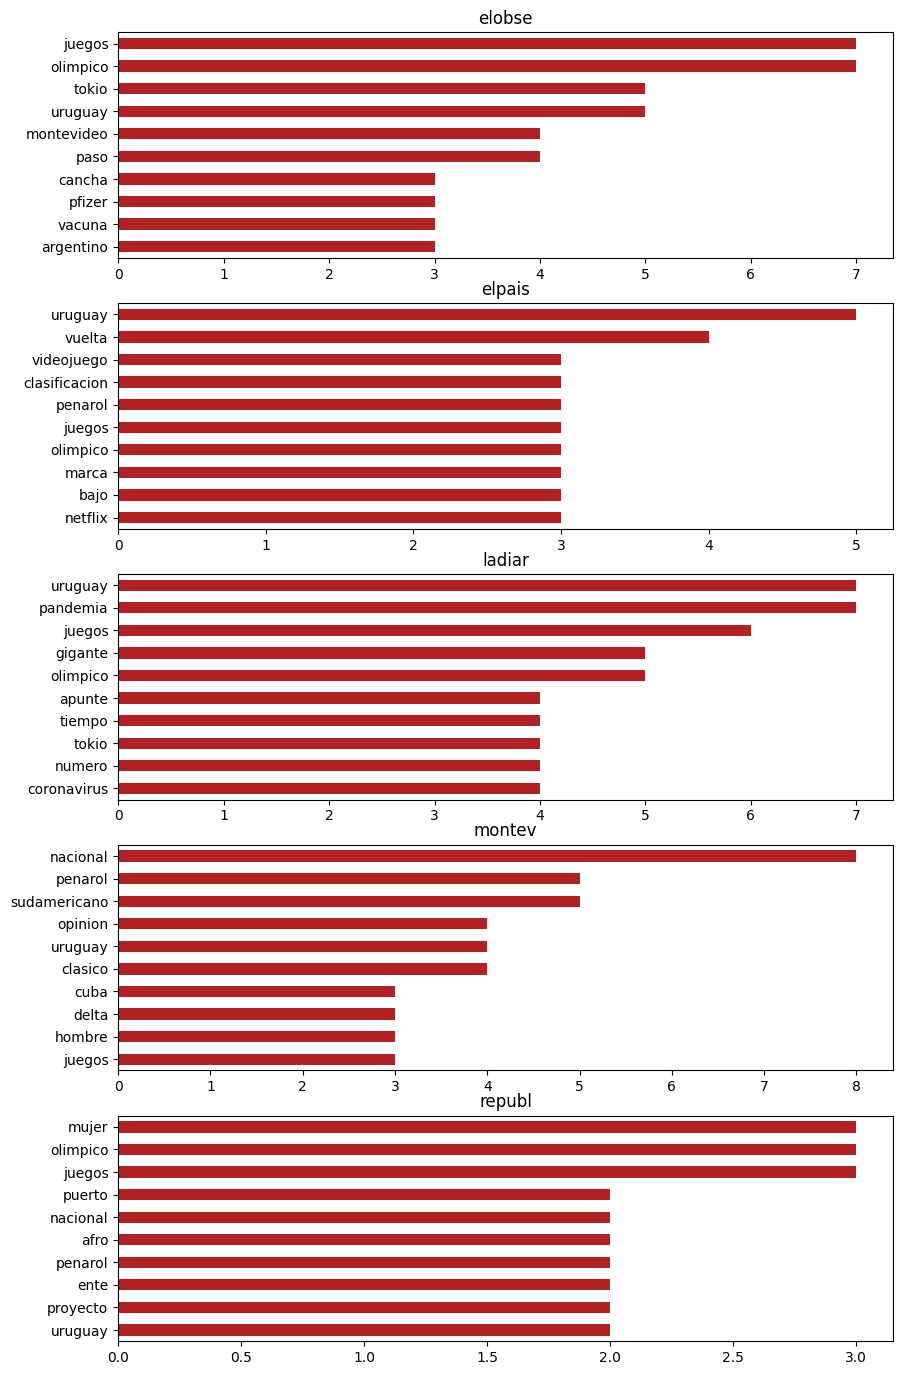

In [189]:
# Gráficos del Top 10 de las palabras por diario
# ==============================================================================
fig, axs = plt.subplots(nrows=5, ncols=1,figsize=(10, 17))
for i, diario in enumerate(base_fecha_tidy.diario.unique()):
    df_temp = base_fecha_tidy[base_fecha_tidy.diario == diario]
    counts  = df_temp['token'].value_counts(ascending=False).head(10)
    counts.plot(kind='barh', color='firebrick', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(diario)

In [217]:
# Top 10 de las palabras más utilizadas por cada diario
# ==============================================================================
base_fecha_tidy.groupby(['diario','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('diario') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(10))

diario          token  count
diario                                   
elobse 179   elobse         juegos      7
       223   elobse       olimpico      7
       316   elobse        uruguay      5
       307   elobse          tokio      5
       206   elobse     montevideo      4
       237   elobse           paso      4
       167   elobse   inauguracion      3
       61    elobse        clasico      3
       22    elobse      argentino      3
       250   elobse         pfizer      3
elpais 710   elpais        uruguay      5
       725   elpais         vuelta      4
       600   elpais       olimpico      3
       366   elpais      argentino      3
       373   elpais           bajo      3
       566   elpais          marca      3
       541   elpais         juegos      3
       616   elpais        penarol      3
       720   elpais     videojuego      3
       412   elpais  clasificacion      3
ladiar 1199  ladiar        uruguay      7
       1069  ladiar       pandemia      7
       996   ladiar         juegos      6
       961   ladiar        gigante      5
       1061  ladiar       olimpico      5
       1181  ladiar         tiempo      4
       1185  ladiar          tokio      4
       835   ladiar    coronavirus      4
       763   ladiar         apunte      4
       1058  ladiar         numero      4
montev 1471  montev       nacional      8
       1577  montev   sudamericano      5
       1499  montev        penarol      5
       1484  montev        opinion      4
       1592  montev        uruguay      4
       1287  montev        clasico      4
       1319  montev          delta      3
       1307  montev           cuba      3
       1403  montev         hombre      3
       1430  montev         juegos      3
republ 1728  republ         juegos      3
       1740  republ          mujer      3
       1746  republ       olimpico      3
       1705  republ         fiesta      2
       1741  republ       nacional      2
       1696  republ           ente      2
       1699  republ        estadio      2
       1798  republ          tokio      2
       1753  republ        penarol      2
       1649  republ      ceremonia      2

In [191]:
# Pivotado de datos
# ==============================================================================
base_fecha_pivot = base_fecha_tidy.groupby(["diario","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="diario", values= "count")
base_fecha_pivot.columns.name = None

In [192]:
# Test de correlación (coseno) por el uso y frecuencia de palabras
# ==============================================================================
from scipy.spatial.distance import cosine

def similitud_coseno(a,b):
    distancia = cosine(a,b)
    return 1-distancia

base_fecha_pivot.corr(method=similitud_coseno)

elobse    elpais    ladiar    montev    republ
elobse  1.000000  0.853426  0.884400  0.797738  0.899470
elpais  0.853426  1.000000  0.816099  0.809108  0.890495
ladiar  0.884400  0.816099  1.000000  0.653503  0.831171
montev  0.797738  0.809108  0.653503  1.000000  0.798099
republ  0.899470  0.890495  0.831171  0.798099  1.000000

In [209]:
#tabla_datos.plot(kind='bar')

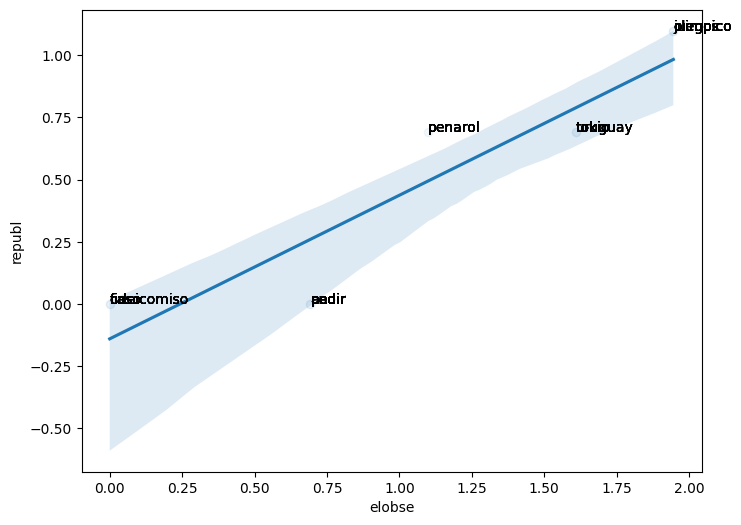

In [210]:
# Gráfico de correlación ESTO TENGO QUE INVESTIGARLO Y PENSARLO MAS PORQUE NO ME QUEDA CLARA LA INTERPRETACIÓN.
# ==============================================================================
f, ax = plt.subplots(figsize=(8, 6))
temp = base_fecha_pivot.dropna()
sns.regplot(
    x  = np.log(temp.elobse),
    y  = np.log(temp.republ),
    scatter_kws =  {'alpha': 0.05},
    ax = ax
);
for i in np.random.choice(range(temp.shape[0]), 100):
    ax.annotate(
        s  = temp.index[i],# en otra version en lugar de s va text
        xy    = (np.log(temp.elobse[i]), np.log(temp.republ[i])),
        alpha = 0.7       
    )

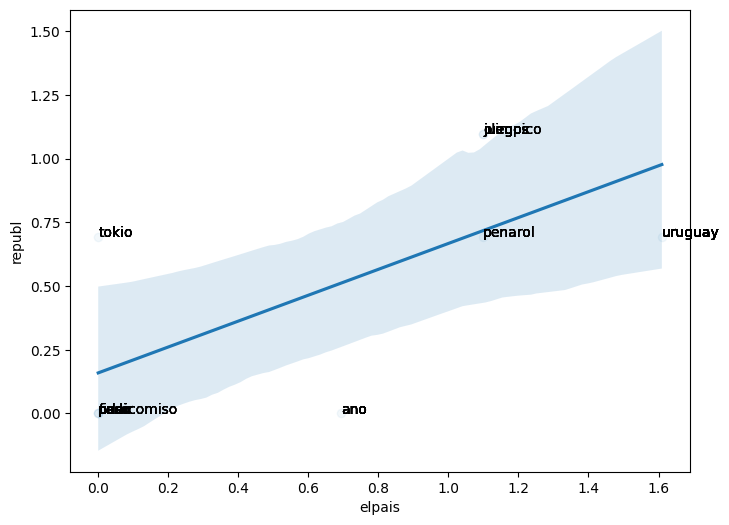

In [220]:
f, ax = plt.subplots(figsize=(8, 6))
temp = base_fecha_pivot.dropna()
sns.regplot(
    x  = np.log(temp.elpais),
    y  = np.log(temp.republ),
    scatter_kws =  {'alpha': 0.05},
    ax = ax
);
for i in np.random.choice(range(temp.shape[0]), 100):
    ax.annotate(
        s  = temp.index[i],# en otra version en lugar de s va text
        xy    = (np.log(temp.elpais[i]), np.log(temp.republ[i])),
        alpha = 0.7       
    )

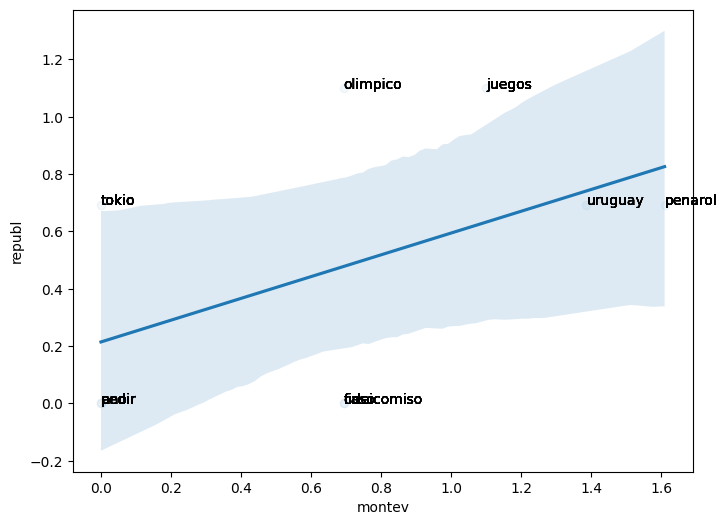

In [221]:
f, ax = plt.subplots(figsize=(8, 6))
temp = base_fecha_pivot.dropna()
sns.regplot(
    x  = np.log(temp.montev),
    y  = np.log(temp.republ),
    scatter_kws =  {'alpha': 0.05},
    ax = ax
);
for i in np.random.choice(range(temp.shape[0]), 100):
    ax.annotate(
        s  = temp.index[i],# en otra version en lugar de s va text
        xy    = (np.log(temp.montev[i]), np.log(temp.republ[i])),
        alpha = 0.7       
    )

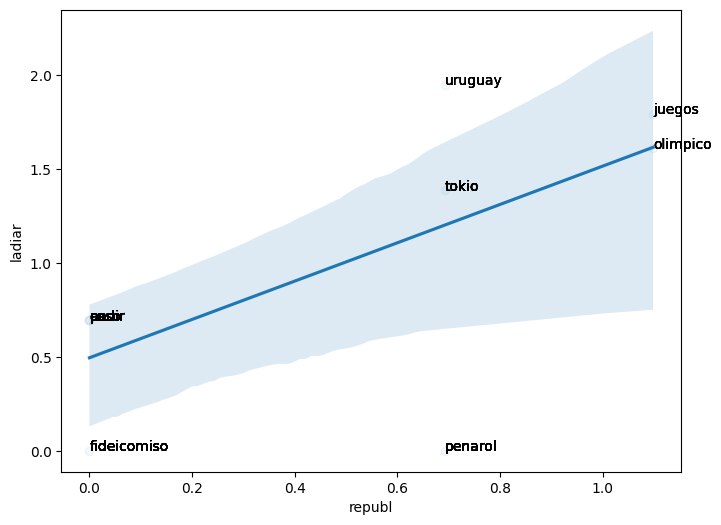

In [219]:
f, ax = plt.subplots(figsize=(8, 6))
temp = base_fecha_pivot.dropna()
sns.regplot(
    x  = np.log(temp.republ),
    y  = np.log(temp.ladiar),
    scatter_kws =  {'alpha': 0.05},
    ax = ax
);
for i in np.random.choice(range(temp.shape[0]), 100):
    ax.annotate(
        s  = temp.index[i],# en otra version en lugar de s va text
        xy    = (np.log(temp.republ[i]), np.log(temp.ladiar[i])),
        alpha = 0.7       
    )

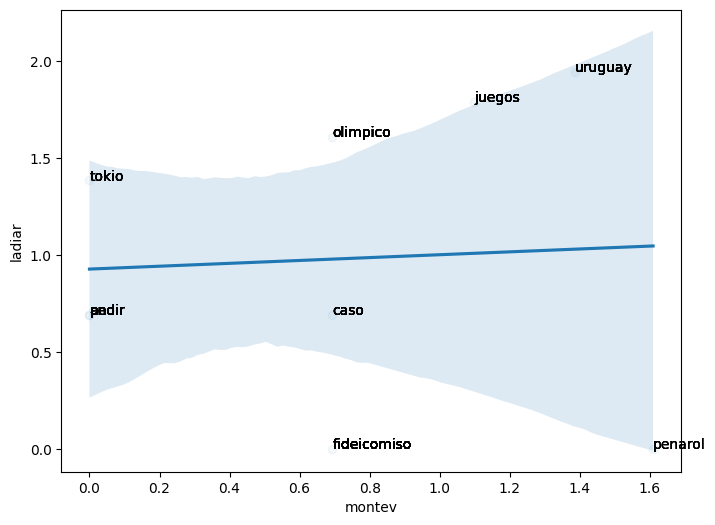

In [213]:
f, ax = plt.subplots(figsize=(8, 6))
temp = base_fecha_pivot.dropna()
sns.regplot(
    x  = np.log(temp.montev),
    y  = np.log(temp.ladiar),
    scatter_kws =  {'alpha': 0.05},
    ax = ax
);
for i in np.random.choice(range(temp.shape[0]), 100):
    ax.annotate(
        s  = temp.index[i],# en otra version en lugar de s va text
        xy    = (np.log(temp.montev[i]), np.log(temp.ladiar[i])),
        alpha = 0.7       
    )

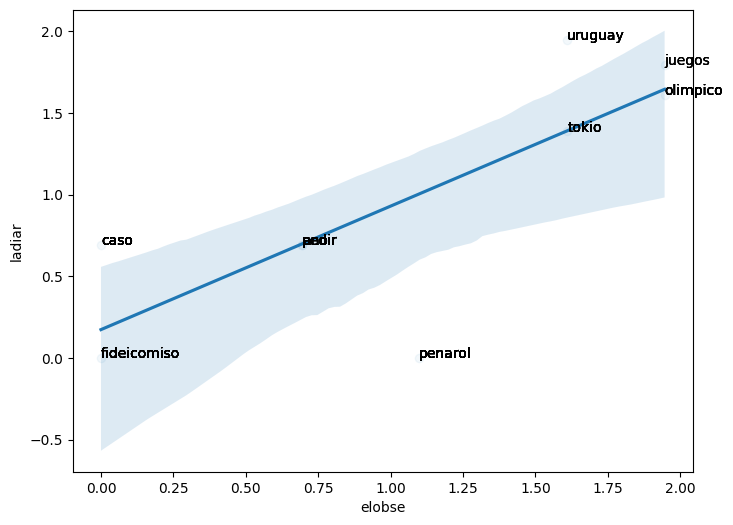

In [214]:
f, ax = plt.subplots(figsize=(8, 6))
temp = base_fecha_pivot.dropna()
sns.regplot(
    x  = np.log(temp.elobse),
    y  = np.log(temp.ladiar),
    scatter_kws =  {'alpha': 0.05},
    ax = ax
);
for i in np.random.choice(range(temp.shape[0]), 100):
    ax.annotate(
        s  = temp.index[i],# en otra version en lugar de s va text
        xy    = (np.log(temp.elobse[i]), np.log(temp.ladiar[i])),
        alpha = 0.7       
    )

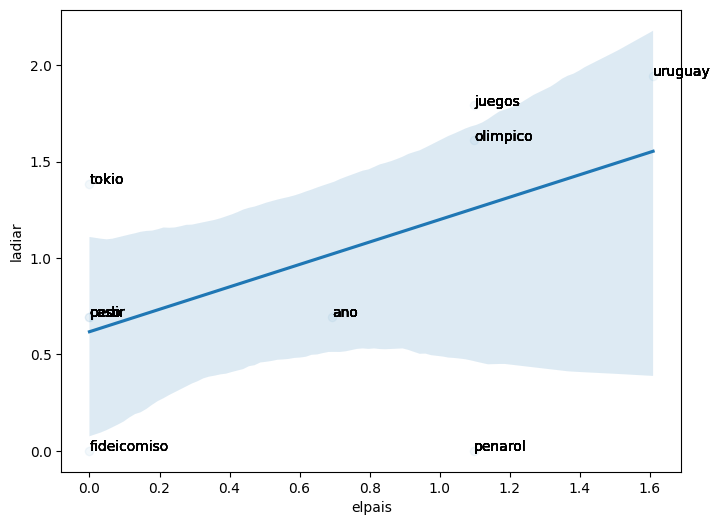

In [218]:
f, ax = plt.subplots(figsize=(8, 6))
temp = base_fecha_pivot.dropna()
sns.regplot(
    x  = np.log(temp.elpais),
    y  = np.log(temp.ladiar),
    scatter_kws =  {'alpha': 0.05},
    ax = ax
);
for i in np.random.choice(range(temp.shape[0]), 100):
    ax.annotate(
        s  = temp.index[i],# en otra version en lugar de s va text
        xy    = (np.log(temp.elpais[i]), np.log(temp.ladiar[i])),
        alpha = 0.7       
    )

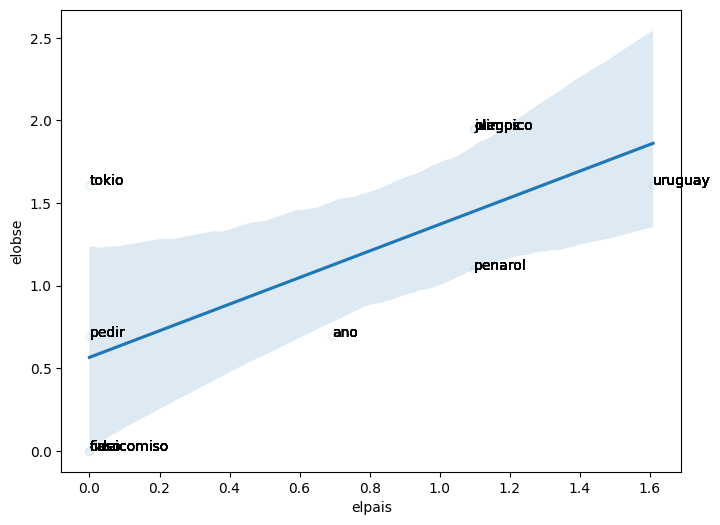

In [222]:
f, ax = plt.subplots(figsize=(8, 6))
temp = base_fecha_pivot.dropna()
sns.regplot(
    x  = np.log(temp.elpais),
    y  = np.log(temp.elobse),
    scatter_kws =  {'alpha': 0.05},
    ax = ax
);
for i in np.random.choice(range(temp.shape[0]), 100):
    ax.annotate(
        s  = temp.index[i],# en otra version en lugar de s va text
        xy    = (np.log(temp.elpais[i]), np.log(temp.elobse[i])),
        alpha = 0.7       
    )

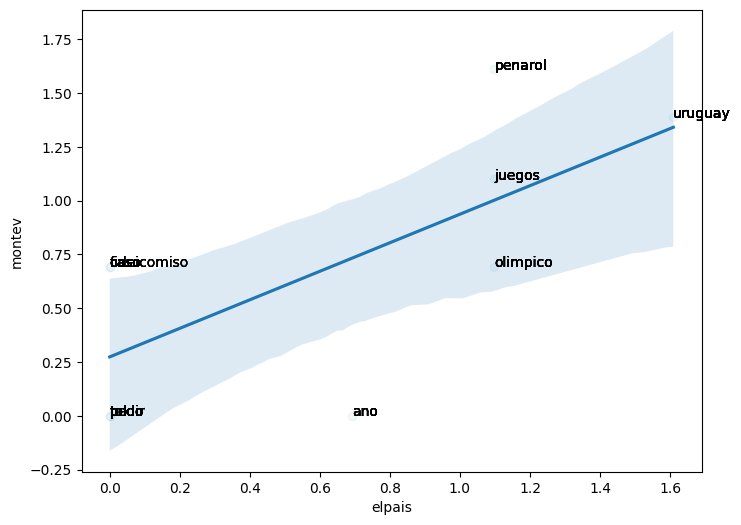

In [223]:
f, ax = plt.subplots(figsize=(8, 6))
temp = base_fecha_pivot.dropna()
sns.regplot(
    x  = np.log(temp.elpais),
    y  = np.log(temp.montev),
    scatter_kws =  {'alpha': 0.05},
    ax = ax
);
for i in np.random.choice(range(temp.shape[0]), 100):
    ax.annotate(
        s  = temp.index[i],# en otra version en lugar de s va text
        xy    = (np.log(temp.elpais[i]), np.log(temp.montev[i])),
        alpha = 0.7       
    )

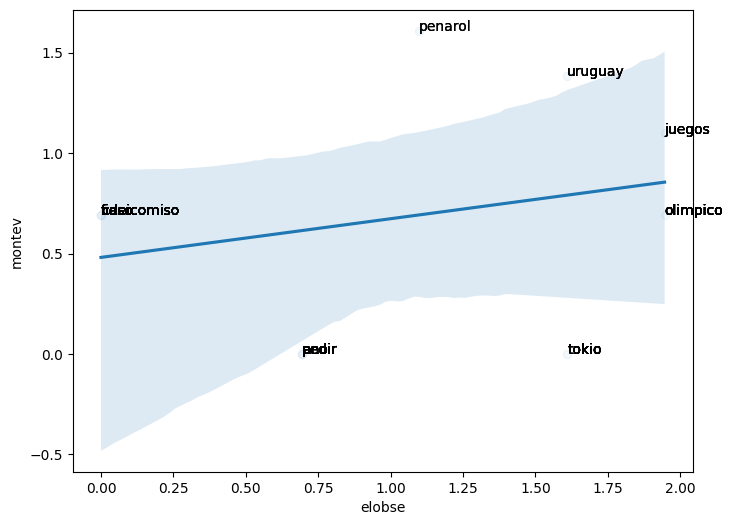

In [224]:
f, ax = plt.subplots(figsize=(8, 6))
temp = base_fecha_pivot.dropna()
sns.regplot(
    x  = np.log(temp.elobse),
    y  = np.log(temp.montev),
    scatter_kws =  {'alpha': 0.05},
    ax = ax
);
for i in np.random.choice(range(temp.shape[0]), 100):
    ax.annotate(
        s  = temp.index[i],# en otra version en lugar de s va text
        xy    = (np.log(temp.elobse[i]), np.log(temp.montev[i])),
        alpha = 0.7       
    )

In [227]:
# Número de palabras comunes
# ==============================================================================
palabras_elpais = set(base_fecha_tidy[base_fecha_tidy.diario == 'elpais']['token'])
palabras_elobse = set(base_fecha_tidy[base_fecha_tidy.diario == 'elobse']['token'])
palabras_ladiar = set(base_fecha_tidy[base_fecha_tidy.diario == 'ladiar']['token'])
palabras_montev = set(base_fecha_tidy[base_fecha_tidy.diario == 'montev']['token'])
palabras_republ = set(base_fecha_tidy[base_fecha_tidy.diario == 'republ']['token'])

print(f"Palabras comunes entre elpais y elobse: {len(palabras_elpais.intersection(palabras_elobse))}")
print(f"Palabras comunes entre elpais y montev: {len(palabras_elpais.intersection(palabras_montev))}")
print(f"Palabras comunes entre elpais y ladiar: {len(palabras_elpais.intersection(palabras_ladiar))}")
print(f"Palabras comunes entre elpais y republ: {len(palabras_elpais.intersection(palabras_republ))}")
print(f"Palabras comunes entre elobse y ladiar: {len(palabras_elobse.intersection(palabras_ladiar))}")
print(f"Palabras comunes entre elobse y republ: {len(palabras_elobse.intersection(palabras_republ))}")
print(f"Palabras comunes entre elobse y montev: {len(palabras_elobse.intersection(palabras_montev))}")
print(f"Palabras comunes entre republ y montev: {len(palabras_republ.intersection(palabras_montev))}")
print(f"Palabras comunes entre republ y ladiar: {len(palabras_republ.intersection(palabras_ladiar))}")
print(f"Palabras comunes entre montev y ladiar: {len(palabras_montev.intersection(palabras_ladiar))}")


Palabras comunes entre elpais y elobse: 65
Palabras comunes entre elpais y montev: 64
Palabras comunes entre elpais y ladiar: 79
Palabras comunes entre elpais y republ: 44
Palabras comunes entre elobse y ladiar: 77
Palabras comunes entre elobse y republ: 46
Palabras comunes entre elobse y montev: 58
Palabras comunes entre republ y montev: 42
Palabras comunes entre republ y ladiar: 58
Palabras comunes entre montev y ladiar: 59


In [233]:
# Cálculo del log of odds ratio de cada palabra (elobse vs republ)
# ==============================================================================
# Pivotaje y despivotaje
tit_pivot = base_fecha_tidy.groupby(["diario","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="diario", values= "count")

tit_pivot = tit_pivot.fillna(value=0)
tit_pivot.columns.name = None

tit_unpivot = tit_pivot.melt(value_name='n', var_name='diario', ignore_index=False)
tit_unpivot = tit_unpivot.reset_index()

# Selección de los diarios elobse y republ
tit_unpivot = tit_unpivot[tit_unpivot.diario.isin(['elobse', 'republ'])]

# Se añade el total de palabras de cada diario
tit_unpivot = tit_unpivot.merge(
                    base_fecha_tidy.groupby('diario')['token'].count().rename('N'),
                    how = 'left',
                    on  = 'diario'
                 )

# Cálculo de odds y log of odds de cada palabra
tit_logOdds = tit_unpivot.copy()
tit_logOdds['odds'] = (tit_logOdds.n + 1) / (tit_logOdds.N + 1)
tit_logOdds = tit_logOdds[['token', 'diario', 'odds']] \
                    .pivot(index='token', columns='diario', values='odds')
tit_logOdds.columns.name = None

tit_logOdds['log_odds']     = np.log(tit_logOdds.elobse/tit_logOdds.republ)
tit_logOdds['abs_log_odds'] = np.abs(tit_logOdds.log_odds)

# Si el logaritmo de odds es mayor que cero, significa que es una palabra con
# mayor probabilidad de ser de elobse. Esto es así porque el ratio sea ha
# calculado como elobse/republ.
tit_logOdds['diario_frecuente'] = np.where(tit_logOdds.log_odds > 0,
                                              "elobse",
                                              "republ"
                                    )

In [235]:
tit_logOdds.sort_values('abs_log_odds', ascending=False).head(10)

elobse    republ  log_odds  abs_log_odds diario_frecuente
token                                                                
mujer     0.002427  0.018519 -2.032039      2.032039           republ
fiesta    0.002427  0.013889 -1.744357      1.744357           republ
afro      0.002427  0.013889 -1.744357      1.744357           republ
ente      0.002427  0.013889 -1.744357      1.744357           republ
nacional  0.002427  0.013889 -1.744357      1.744357           republ
estadio   0.002427  0.013889 -1.744357      1.744357           republ
puerto    0.002427  0.013889 -1.744357      1.744357           republ
disculpa  0.002427  0.009259 -1.338892      1.338892           republ
doble     0.002427  0.009259 -1.338892      1.338892           republ
dolor     0.002427  0.009259 -1.338892      1.338892           republ

In [231]:
# Cálculo del log of odds ratio de cada palabra (elobse vs montev)
# ==============================================================================
# Pivotaje y despivotaje
tit_pivot = base_fecha_tidy.groupby(["diario","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="diario", values= "count")

tit_pivot = tit_pivot.fillna(value=0)
tit_pivot.columns.name = None

tit_unpivot = tit_pivot.melt(value_name='n', var_name='diario', ignore_index=False)
tit_unpivot = tit_unpivot.reset_index()

# Selección de los diarios elobse y montev
tit_unpivot = tit_unpivot[tit_unpivot.diario.isin(['elobse', 'montev'])]

# Se añade el total de palabras de cada diario
tit_unpivot = tit_unpivot.merge(
                    base_fecha_tidy.groupby('diario')['token'].count().rename('N'),
                    how = 'left',
                    on  = 'diario'
                 )

# Cálculo de odds y log of odds de cada palabra
tit_logOdds = tit_unpivot.copy()
tit_logOdds['odds'] = (tit_logOdds.n + 1) / (tit_logOdds.N + 1)
tit_logOdds = tit_logOdds[['token', 'diario', 'odds']] \
                    .pivot(index='token', columns='diario', values='odds')
tit_logOdds.columns.name = None

tit_logOdds['log_odds']     = np.log(tit_logOdds.elobse/tit_logOdds.montev)
tit_logOdds['abs_log_odds'] = np.abs(tit_logOdds.log_odds)

# Si el logaritmo de odds es mayor que cero, significa que es una palabra con
# mayor probabilidad de ser de elobse. Esto es así porque el ratio sea ha
# calculado como elobse/montev.
tit_logOdds['diario_frecuente'] = np.where(tit_logOdds.log_odds > 0,
                                              "elobse",
                                              "montev"
                                    )

In [232]:
tit_logOdds.sort_values('abs_log_odds', ascending=False).head(10)

elobse    montev  log_odds  abs_log_odds diario_frecuente
token                                                                    
nacional      0.002427  0.019956 -2.106781      2.106781           montev
sudamericano  0.002427  0.013304 -1.701315      1.701315           montev
montevideo    0.012136  0.002217  1.699882      1.699882           elobse
paso          0.012136  0.002217  1.699882      1.699882           elobse
cancha        0.009709  0.002217  1.476738      1.476738           elobse
dosis         0.009709  0.002217  1.476738      1.476738           elobse
inauguracion  0.009709  0.002217  1.476738      1.476738           elobse
pfizer        0.009709  0.002217  1.476738      1.476738           elobse
argentino     0.009709  0.002217  1.476738      1.476738           elobse
hombre        0.002427  0.008869 -1.295850      1.295850           montev

In [236]:
# Cálculo del log of odds ratio de cada palabra (elobse vs elpais)
# ==============================================================================
# Pivotaje y despivotaje
tit_pivot = base_fecha_tidy.groupby(["diario","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="diario", values= "count")

tit_pivot = tit_pivot.fillna(value=0)
tit_pivot.columns.name = None

tit_unpivot = tit_pivot.melt(value_name='n', var_name='diario', ignore_index=False)
tit_unpivot = tit_unpivot.reset_index()

# Selección de los diarios elobse y elpais
tit_unpivot = tit_unpivot[tit_unpivot.diario.isin(['elobse', 'elpais'])]

# Se añade el total de palabras de cada diario
tit_unpivot = tit_unpivot.merge(
                    base_fecha_tidy.groupby('diario')['token'].count().rename('N'),
                    how = 'left',
                    on  = 'diario'
                 )

# Cálculo de odds y log of odds de cada palabra
tit_logOdds = tit_unpivot.copy()
tit_logOdds['odds'] = (tit_logOdds.n + 1) / (tit_logOdds.N + 1)
tit_logOdds = tit_logOdds[['token', 'diario', 'odds']] \
                    .pivot(index='token', columns='diario', values='odds')
tit_logOdds.columns.name = None

tit_logOdds['log_odds']     = np.log(tit_logOdds.elobse/tit_logOdds.elpais)
tit_logOdds['abs_log_odds'] = np.abs(tit_logOdds.log_odds)

# Si el logaritmo de odds es mayor que cero, significa que es una palabra con
# mayor probabilidad de ser de elobse. Esto es así porque el ratio sea ha
# calculado como elobse/elpais.
tit_logOdds['diario_frecuente'] = np.where(tit_logOdds.log_odds > 0,
                                              "elobse",
                                              "elpais"
                                    )

In [237]:
tit_logOdds.sort_values('abs_log_odds', ascending=False).head(10)

elobse    elpais  log_odds  abs_log_odds diario_frecuente
token                                                                     
paso           0.012136  0.002278  1.672914      1.672914           elobse
montevideo     0.012136  0.002278  1.672914      1.672914           elobse
vuelta         0.002427  0.011390 -1.545962      1.545962           elpais
clasico        0.009709  0.002278  1.449770      1.449770           elobse
cancha         0.009709  0.002278  1.449770      1.449770           elobse
pfizer         0.009709  0.002278  1.449770      1.449770           elobse
clasificacion  0.002427  0.009112 -1.322818      1.322818           elpais
bajo           0.002427  0.009112 -1.322818      1.322818           elpais
marca          0.002427  0.009112 -1.322818      1.322818           elpais
imagen         0.007282  0.002278  1.162088      1.162088           elobse

In [238]:
# Cálculo del log of odds ratio de cada palabra (elobse vs ladiar)
# ==============================================================================
# Pivotaje y despivotaje
tit_pivot = base_fecha_tidy.groupby(["diario","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="diario", values= "count")

tit_pivot = tit_pivot.fillna(value=0)
tit_pivot.columns.name = None

tit_unpivot = tit_pivot.melt(value_name='n', var_name='diario', ignore_index=False)
tit_unpivot = tit_unpivot.reset_index()

# Selección de los diarios elobse y ladiar
tit_unpivot = tit_unpivot[tit_unpivot.diario.isin(['elobse', 'ladiar'])]

# Se añade el total de palabras de cada diario
tit_unpivot = tit_unpivot.merge(
                    base_fecha_tidy.groupby('diario')['token'].count().rename('N'),
                    how = 'left',
                    on  = 'diario'
                 )

# Cálculo de odds y log of odds de cada palabra
tit_logOdds = tit_unpivot.copy()
tit_logOdds['odds'] = (tit_logOdds.n + 1) / (tit_logOdds.N + 1)
tit_logOdds = tit_logOdds[['token', 'diario', 'odds']] \
                    .pivot(index='token', columns='diario', values='odds')
tit_logOdds.columns.name = None

tit_logOdds['log_odds']     = np.log(tit_logOdds.elobse/tit_logOdds.ladiar)
tit_logOdds['abs_log_odds'] = np.abs(tit_logOdds.log_odds)

# Si el logaritmo de odds es mayor que cero, significa que es una palabra con
# mayor probabilidad de ser de elobse. Esto es así porque el ratio sea ha
# calculado como elobse/ladiar.
tit_logOdds['diario_frecuente'] = np.where(tit_logOdds.log_odds > 0,
                                              "elobse",
                                              "ladiar"
                                    )

In [241]:
tit_logOdds.sort_values('abs_log_odds', ascending=False).head(10)

elobse    ladiar  log_odds  abs_log_odds diario_frecuente
token                                                                    
montevideo    0.012136  0.001686  1.973609      1.973609           elobse
inauguracion  0.009709  0.001686  1.750465      1.750465           elobse
vacunado      0.009709  0.001686  1.750465      1.750465           elobse
clasico       0.009709  0.001686  1.750465      1.750465           elobse
cancha        0.009709  0.001686  1.750465      1.750465           elobse
pandemia      0.002427  0.013491 -1.715270      1.715270           ladiar
estrella      0.007282  0.001686  1.462783      1.462783           elobse
menor         0.007282  0.001686  1.462783      1.462783           elobse
palpitar      0.007282  0.001686  1.462783      1.462783           elobse
detenido      0.007282  0.001686  1.462783      1.462783           elobse

In [242]:
# Cálculo del log of odds ratio de cada palabra (elpais vs ladiar)
# ==============================================================================
# Pivotaje y despivotaje
tit_pivot = base_fecha_tidy.groupby(["diario","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="diario", values= "count")

tit_pivot = tit_pivot.fillna(value=0)
tit_pivot.columns.name = None

tit_unpivot = tit_pivot.melt(value_name='n', var_name='diario', ignore_index=False)
tit_unpivot = tit_unpivot.reset_index()

# Selección de los diarios elpais y ladiar
tit_unpivot = tit_unpivot[tit_unpivot.diario.isin(['elpais', 'ladiar'])]

# Se añade el total de palabras de cada diario
tit_unpivot = tit_unpivot.merge(
                    base_fecha_tidy.groupby('diario')['token'].count().rename('N'),
                    how = 'left',
                    on  = 'diario'
                 )

# Cálculo de odds y log of odds de cada palabra
tit_logOdds = tit_unpivot.copy()
tit_logOdds['odds'] = (tit_logOdds.n + 1) / (tit_logOdds.N + 1)
tit_logOdds = tit_logOdds[['token', 'diario', 'odds']] \
                    .pivot(index='token', columns='diario', values='odds')
tit_logOdds.columns.name = None

tit_logOdds['log_odds']     = np.log(tit_logOdds.elpais/tit_logOdds.ladiar)
tit_logOdds['abs_log_odds'] = np.abs(tit_logOdds.log_odds)

# Si el logaritmo de odds es mayor que cero, significa que es una palabra con
# mayor probabilidad de ser de elobse. Esto es así porque el ratio sea ha
# calculado como elpais/ladiar.
tit_logOdds['diario_frecuente'] = np.where(tit_logOdds.log_odds > 0,
                                              "elpais",
                                              "ladiar"
                                    )

In [245]:
tit_logOdds.sort_values('abs_log_odds', ascending=False).head(10)

elpais    ladiar  log_odds  abs_log_odds diario_frecuente
token                                                                     
marca          0.009112  0.001686  1.686989      1.686989           elpais
videojuego     0.009112  0.001686  1.686989      1.686989           elpais
clasificacion  0.009112  0.001686  1.686989      1.686989           elpais
netflix        0.009112  0.001686  1.686989      1.686989           elpais
bajo           0.009112  0.001686  1.686989      1.686989           elpais
gigante        0.002278  0.010118 -1.491064      1.491064           ladiar
minuto         0.006834  0.001686  1.399307      1.399307           elpais
pasar          0.006834  0.001686  1.399307      1.399307           elpais
siglo          0.006834  0.001686  1.399307      1.399307           elpais
eliminar       0.006834  0.001686  1.399307      1.399307           elpais

In [199]:
tabla_datos = pd.crosstab(index=base_fecha['sentimiento'], \
                          columns=base_fecha['diario'], margins=True)
# si saco margins=True me da solo los valores
tabla_datos

diario       elobse  elpais  ladiar  montev  republ  All
sentimiento                                             
NEG               9      15      16       9       5   54
NEU              53      46      67      58      45  269
POS               7       8       4       3       3   25
All              69      69      87      70      53  348

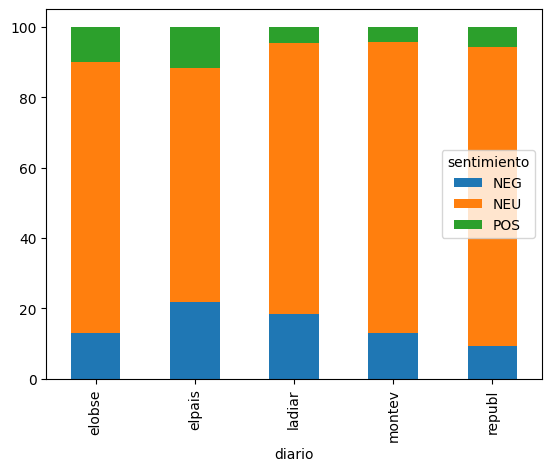

In [208]:
# esto lo saqué de: https://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/
#, stacked=True
plot = pd.crosstab(index=base_fecha['diario'],
            columns=base_fecha['sentimiento']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=1).plot(kind='bar', stacked=True)